In [25]:
# Create a twitter connection using TwitterAPI:
# https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI
def get_twitter(config_file):
    """Read the config_file and construct an instance of TwitterAPI.
    Args:
        config_file ... A config file in configParser format with Twitter credentials
        Returns:
            An instance of TwitterAPI."""
    config = configparser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
        config.get('twitter','consumer_key'),
        config.get('twitter','consumer_secret'),
        config.get('twitter','access_token'),
        config.get('twitter','access_token_secret'),
    )
    return twitter
twitter = get_twitter('twitter.cfg')
print('Established Twitter connection.')

Established Twitter connection.


In [26]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [27]:
# What can we do with this twitter object?
# builtin method `dir` tells us..
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [28]:
# Get help on the `request` method using the builtin method called... `help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [29]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'})

In [30]:
# What object is returned?
# builtin type method will tell us.
print(type(request))

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


In [31]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [32]:
for i in [1,2,3]:
    print(i)

1
2
3


In [33]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [34]:
# The _iter_ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See
# https://docs.python.org/2/tutorial/datastructures.html

In [35]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [36]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [37]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [38]:
# Print keys.
a_tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [39]:
# The test.
print(a_tweet['text'])
print(a_tweet['created_at'])

RT @SiliconArmada: Chicago is looking for Java Developers like you! #Java Check it out: https://t.co/2vW75yiOar https://t.co/li5qSrWjIf
Thu Sep 28 20:52:35 +0000 2017


In [40]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Mon Oct 10 22:06:57 +0000 2011',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'iAdvice! iEncourage! iHype! Familiar With: Php, JavaScript, Node, Angular, Cordova, Ionic\nContact:\nzolayinka@trenchardhub.com\nbundayy@outlook.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'trenchardhub.com',
     'expanded_url': 'http://www.trenchardhub.com',
     'indices': [0, 23],
     'url': 'https://t.co/VSOuTKmT6t'}]}},
 'favourites_count': 340,
 'follow_request_sent': False,
 'followers_count': 1526,
 'following': False,
 'friends_count': 1151,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 388526769,
 'id_str': '388526769',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 18,
 'location': 'Unknown ',
 'name': 'Olayinka Olabode',
 'notifications': False,
 'profile_background_color': '709397',
 'profile_background_image_url': 'htt

In [41]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=bundayy_, name=Olayinka Olabode, location=Unknown 


In [42]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count': 200})
followers = [r for r in request]

print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timeline

found 200 followers for bundayy_


In [43]:
type(followers[0])

dict

In [44]:
followers[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'live_following', 'follow_request_sent', 'notifications', 'muting', 'blocking', 'blocked_by', 'translator_type'])

In [45]:
followers[0]['screen_name']

'denzelbadass'

In [23]:
# What happens if we het an error
request = twitter.request('followers/list',
                         {'screen_name': 'this_is_not_a_valid_screen_name',
                         'count':200})

In [24]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [ ]:
request.status_code

In [46]:
#### Limitations
# Can only search 2 weeks in past but can get upto 3200 most recent tweets of a user
# Rate limits! e.g 180 request in 15 minute window.
# https://dev.twitter.com/docs/rate-limiting/1.1/limits


In [47]:
# Working around rate limits.
def robust_request(twitter, resources, params, max_tries=5):
    """If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
        twitter ..... A TwitterAPI object.
        resources ... A reqource string to request.
        params ...... A parameter dictionary for the request.
        max_tries ... The maximum number of triws to attempt.
    Return:
        A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % requesy.text)
            time.sleep(61*15)

In [48]:
# Drawing graphs with NetworkX
import warnings
warnings.filterwarnings("ignore")
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [49]:
# Didn't draw anything? Need to place it inline
import matplotlib.pyplot as plt
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

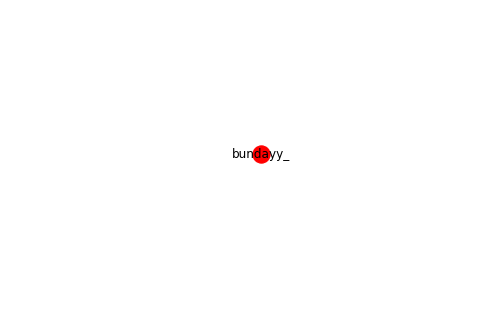

In [50]:
nx.draw(graph, with_labels=True)

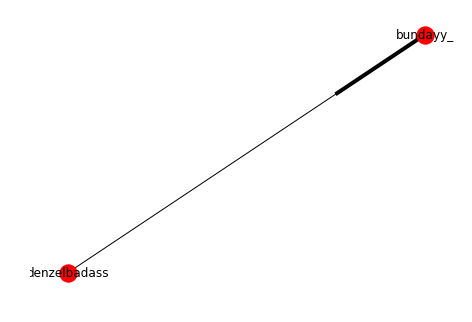

In [51]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

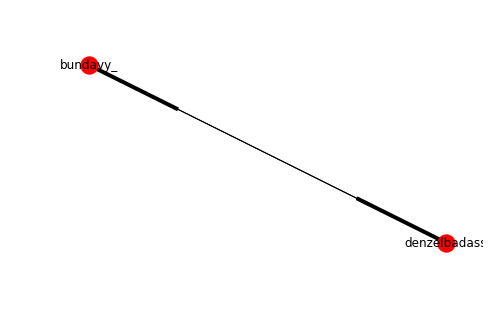

In [52]:
# Make link symmetric
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [53]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 200 tweets for user bundayy_


In [54]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

RT @SiliconArmada: Chicago is looking for Java Developers like you! #Java Check it out: https://t.co/2vW75yiOar https://t.co/li5qSrWjIf
RT @LeoKolade: President who can create jobs, make the economy better and give us 24 hours light. I will vote for till he dies
RT @WinnieDoube: #GainWithXtianDela
RT @FergieFanboy: With Matic you don't have to wait till extra time. https://t.co/sN8yDuxRfM
RT @pushcum: 💎 Follow everyone who retweets this 1 mins 💎
Let them first credit me the money, then we will talk more https://t.co/p4ac6cTHLa
The Head of the SEC Is 'Concerned' About ICO Pump-and-Dumps https://t.co/ouVKITYz2L #trenchardhub follow… https://t.co/pTGwpsPQ8I
'He was a bargain at £75 million' – Keane praises Lukaku https://t.co/mdCc5Zw2XF #trenchardhub https://t.co/jAHBKKn15C
Kane has 'potential to be one of the best' – Lloris https://t.co/xuJ08cofT7 #trenchardhub https://t.co/bnoVQildNQ
Atlanta United clinches playoff spot in debut campaign https://t.co/SpqoQubthK #trenchardhub https://t.c

In [55]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.

In [56]:
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [57]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespaces
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1554 unique terms in 200 tweets


[('#trenchardhub', 119),
 ('the', 61),
 ('rt', 52),
 ('to', 50),
 ('follow', 33),
 ('follow…', 33),
 ('for', 31),
 ('@trenchardhub', 31),
 ('in', 29),
 ('is', 28)]

In [58]:
list(counts.keys())[0]

'rt'

In [59]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [60]:
sorted([('joe', 10), ('mary', 20), ('jim',15), ('joe', 5)],
      key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [61]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1])
               for item in sorted_counts))

#trenchardhub=119
the=61
rt=52
to=50
follow=33
follow…=33
for=31
@trenchardhub=31
in=29
is=28
a=28
and=24
bitcoin=21
–=20
of=18
be=17
news:=14
on=13
from=13
me=12
people=12
man=12
i=11
arsenal=11
blockchain=11
&amp;=11
latest=11
you=10
this=10
at=10
transfer=10
rumours=10
it=9
can=9
chelsea=9
with=8
ft=8
will=7
we=7
but=7
as=7
live=7
player=7
-=7
not=6
are=6
my=6
by=6
new=6
price=6
vs=6
utd=6
barcelona=6
like=5
more=5
ico=5
how=5
back=5
just=5
if=5
after=5
all=5
up=5
mod=5
top=5
team=5
teams=5
first=4
one=4
still=4
followed=4
unfollowed=4
//=4
automatically=4
checked=4
https://t.co/reiq8pvqkx=4
out=4
that=4
your=4
win=4
exchange=4
china=4
league=4
bitcoin's=4
ethereum=4
start=4
looking=3
make=3
better=3
he=3
them=3
was=3
united=3
gain=3
doing=3
no=3
away=3
15=3
😭😭😭=3
iphone=3
same=3
it's=3
token=3
prices=3
above=3
why=3
madrid=3
champions=3
takes=3
time=3
best=3
i'm=3
can't=3
might=3
asap=3
or=3
old=3
apk=3
launch=3
test=3
says=3
wenger=3
#trenchardhub…=3
premier=3
cryptocurrency=3
may

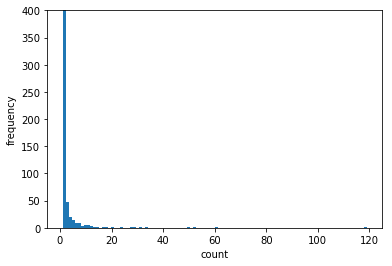

In [62]:
# Plot these counts
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,400))
plt.show()

<b>Zipf's law</b>: (roughly) there are many rare words; there are a small number of extremely frequent words.

Alternatively:
The frequency of a term is inversely proportional to its rank.

Let $f_{i}$ be the frequency of the $i^{th}$ most common term.

$f_{i}\propto\frac{1}{i}$

equivalently
$f_{i} = k*i^b$ for constant $k$ and $b = -1$

In [63]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[119, 61, 52, 50, 33, 33, 31, 31, 29, 28]

In [64]:
ranks = list(range(1, len(freqs)+1))

In [65]:
# Minimize mean squared error to find the best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

In [66]:
# Define the zipf function and fit the k parameter.
def zipfs(i, k):
    return k/i
zipf_parms,covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is %.2f*T^-1' % zipf_parms[0])

Zipf fit is 142.06*T^-1


In [67]:
zipf_parms

array([ 142.06038894])

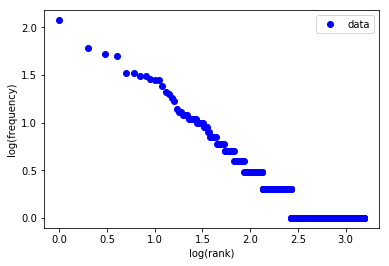

In [68]:
# Try a log-log plot.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.plot(l_ranks, l_freqs, 'ob', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

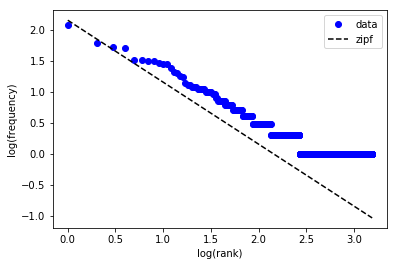

In [69]:
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')
